In [1]:
import folium
import openrouteservice
from openrouteservice import convert
import math
import pandas as pd
import numpy as np
import decimal
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt

In [2]:
file_path = "gurugram_data.csv"
data = pd.read_csv(file_path)

In [3]:
data.columns

Index(['id', 'latitude', 'longitude', 'nearest_node', 'degree'], dtype='object')

In [4]:
data.head()

,id,latitude,longitude,nearest_node,degree
0,node,28.461697,77.087018,249350111,4
1,node,28.536270,77.197371,250078367,4
2,node,28.450043,77.063861,9903240504,4
3,node,28.482711,77.107530,251691410,3
4,node,28.491757,77.090856,5228569733,3


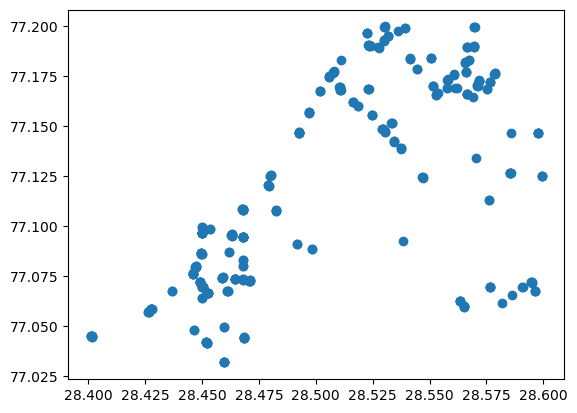

In [5]:
x , y  = data['latitude'] , data['longitude']

plt.scatter(x, y)
plt.show()

In [6]:
coords_path = [[lon, lat] for lon, lat in zip(data['longitude'], data['latitude'])]
n = folium.Map(location=list(reversed([77.09, 28.5])), tiles="cartodbpositron", zoom_start=12)
for coord in coords_path:
    folium.Marker(location=list(reversed(coord))).add_to(n)
n

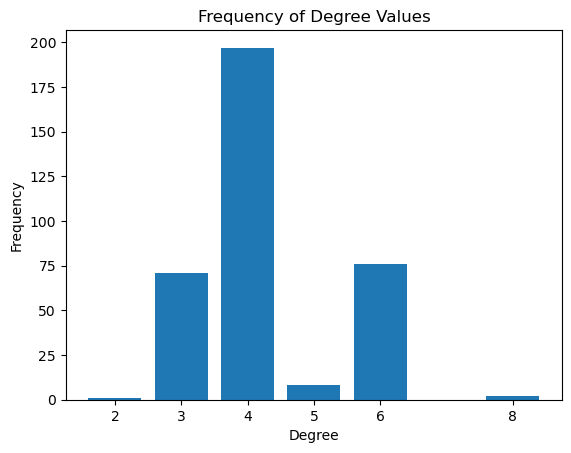

In [7]:
degree_counts = data['degree'].value_counts()

plt.bar(degree_counts.index, degree_counts.values)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency of Degree Values')
plt.xticks(degree_counts.index)

plt.show()

In [8]:
filtered_df = data[data['degree'].isin([5, 6, 8])]
filtered_df

,id,latitude,longitude,nearest_node,degree
17,node,28.458669,77.074044,9501049071,5
24,node,28.585618,77.146488,9794116732,6
30,node,28.575097,77.168516,282138885,6
41,node,28.597626,77.146186,11780481158,5
42,node,28.597724,77.146207,11780481159,6
...,...,...,...,...,...
341,node,28.450235,77.069544,9903465142,6
342,node,28.449102,77.071824,3204210851,6
343,node,28.449283,77.071733,9903465132,6
344,node,28.449296,77.071866,9903465132,6


In [9]:
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for idx, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Node ID: {row['id']}<br>Degree: {row['degree']}",
        icon=folium.Icon(color='red' if row['degree'] == 8 else 'orange' if row['degree'] == 6 else 'blue')
    ).add_to(m)

m.save('map.html')

# Display map in a Jupyter notebook (optional)
m
